## Umap

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
annot = pd.DataFrame(all_site_pivot.index)

In [ ]:
annot = annot.merge(all_site[['sub_site','site','site_seq','substrate_genes']])

In [ ]:
sty = pd.get_dummies(annot['site'].str[0]).astype(int)

In [ ]:
sty = sty.set_index(all_site_pivot.index)

In [ ]:
all_site_pivot_sty = pd.concat([all_site_pivot,sty],axis=1)

In [ ]:
all_site_pivot_sty.head()

,1,2,3,4,5,6,7,8,9,10,...,740,741,742,743,744,745,746,S,T,Y
sub_site,,,,,,,,,,,,,,,,,,,,,
A0A024R4G9_S20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A0A075B6Q4_S24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A0A075B6Q4_S35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A0A075B6Q4_S57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A0A075B6Q4_S68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
reducer = umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='jaccard',
    # min_dist=0.1,
    # random_state=42,
    # verbose=True,
)
embedding = reducer.fit_transform(all_site_pivot_sty)

f:\git\katlas\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\git\katlas\.venv\lib\site-packages\logomaker/..\umap\umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [ ]:
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

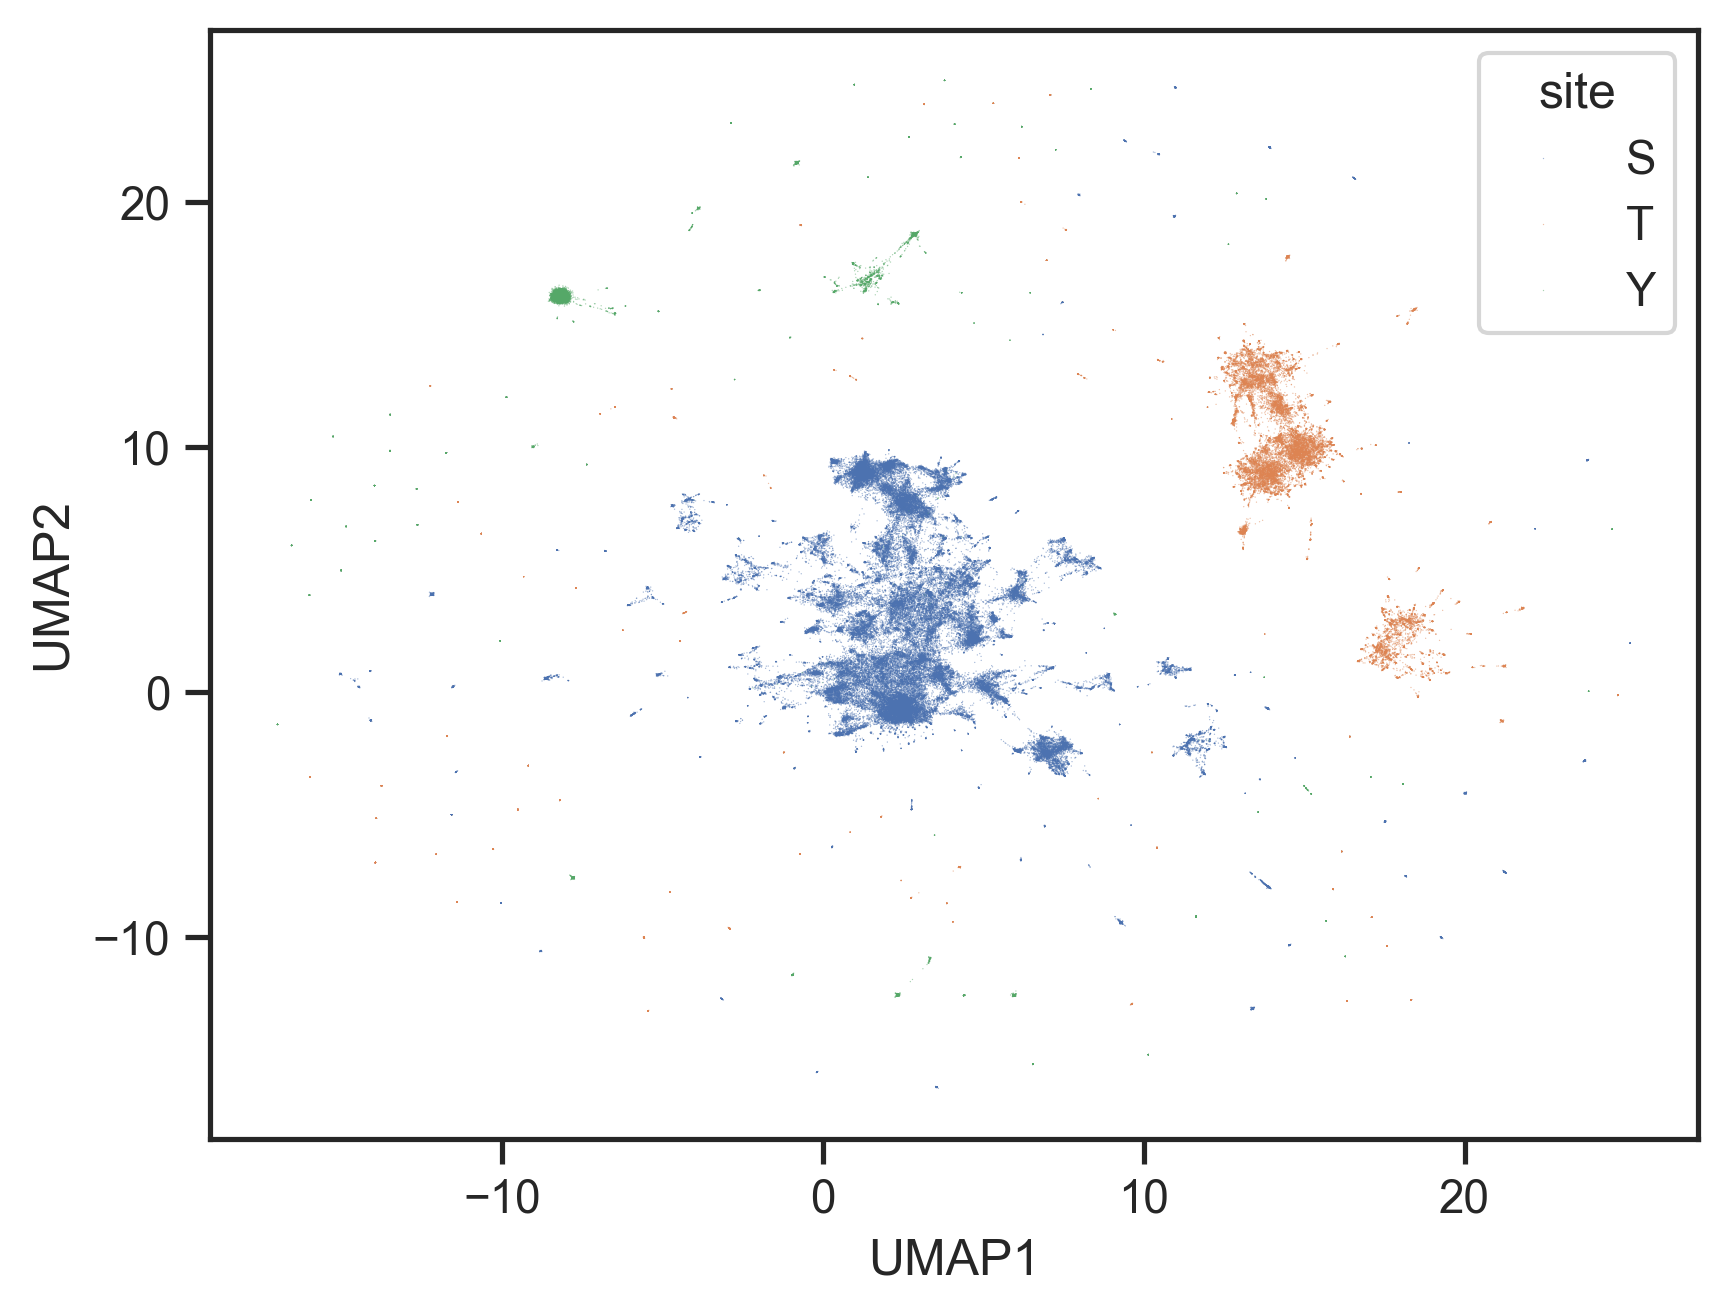

In [ ]:
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', alpha=0.5,
                s=0.1,
                edgecolor='none',hue=annot['site'].str[0])

In [ ]:
annot['site_seq'].str.len()//2

0         20
1         20
2         20
3         20
4         20
          ..
131838    20
131839    20
131840    20
131841    20
131842    20
Name: site_seq, Length: 131843, dtype: int64

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

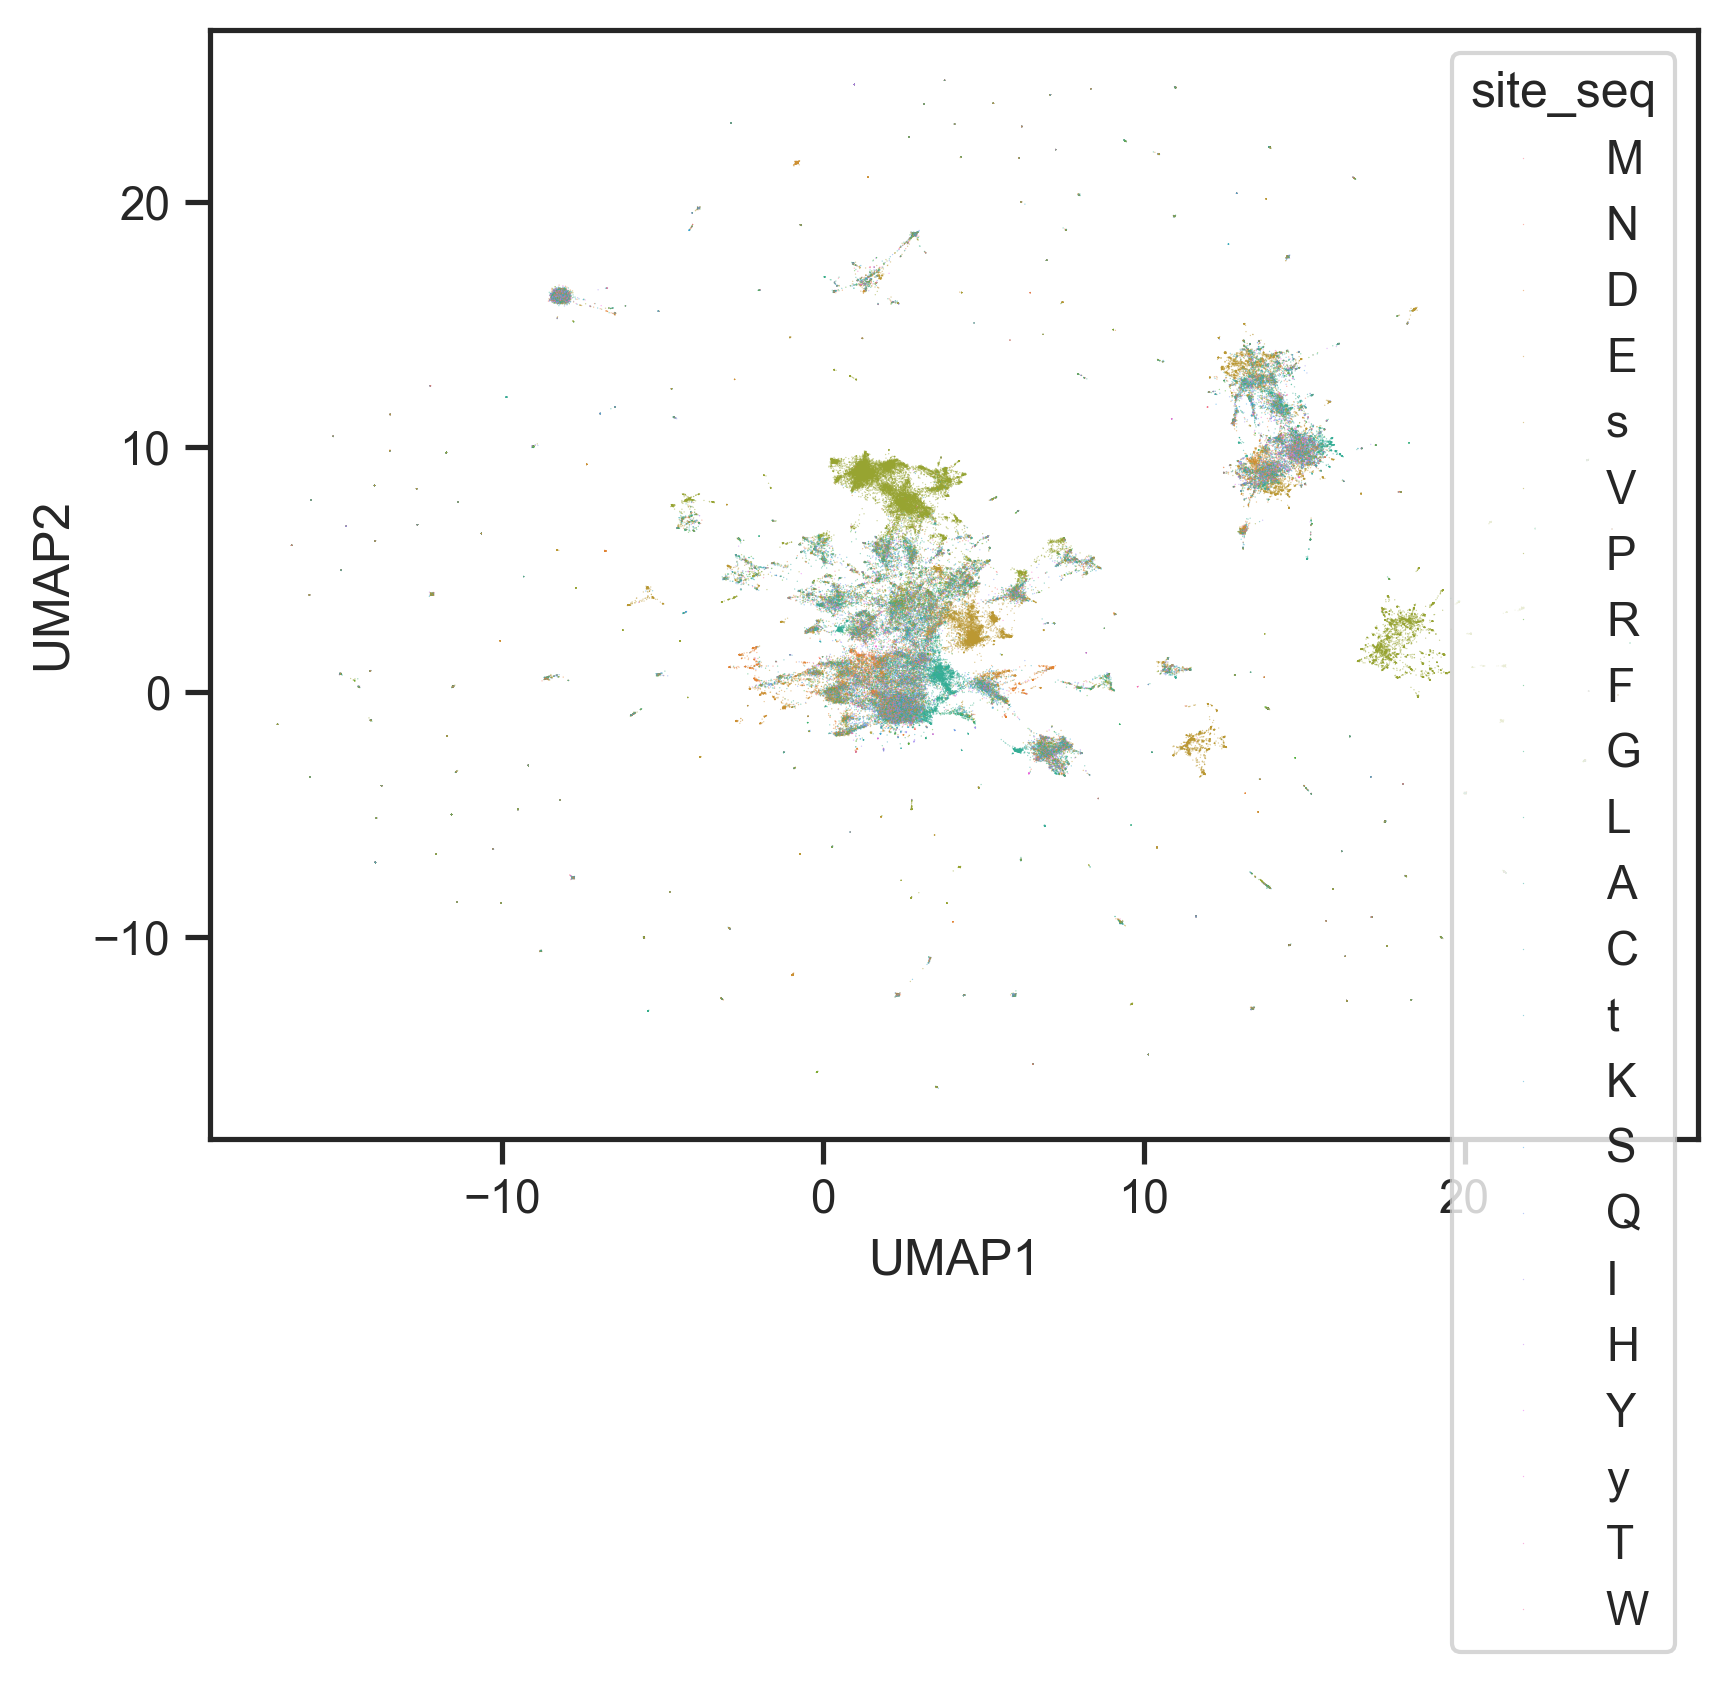

In [ ]:
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', alpha=0.5,
                s=0.1,
                edgecolor='none',hue=annot['site_seq'].str[21])